### Exercise 2a

#### Task 1

**Improve the recognition accuracy manually by changing some of the parameters of the
‘Exercise_train_test.py’ code. Modify the layer sizes (excluding the input and output
sizes), batch size etc.**

Below is copy of the model from the Exercise_train_test.py. Accuracy has increased from 89% to 90.5%. This is a small improvement. 

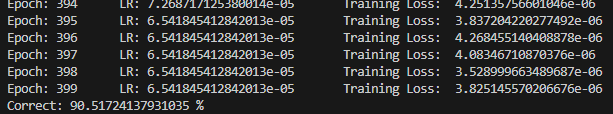

Changes to model:

```num_units: 700 -> 300```

```num_units1: 1000 -> 700```

New layer with size

```num_units2 = 500```

Smaller layer sizes result in faster training time and has advantage for learning patterns. Large layers may result in overfitting for our relatively small dataset (930 x 200). Also previous dense layer is removed, which input and output size are the same.

```self.dense1 = nn.Linear(num_units, num_units)``` 


Nonlinear activation function changed from Relu to leaky_relu. This reduces the amount of dead neurons in the model, which are constantly outputting zero. Basicly it works in the same way as Relu but for negative input is never a zero.

Size of 5 is relatively small, and it is increased from 5 to 16, which gives better approximation for the gradients since it is averaged on more samples.

In [ ]:
class classifier_selfmade_network(nn.Module):
    def __init__(
            self,
            inp_units=3*69, #heart rate, speed and altitude data
            num_units=300,   #hidden units
            num_units1=700,   #hidden units
            num_units2=500,   #hidden units
            out_units=3,    #classification 0, 1 or 2
            nonlin=F.leaky_relu,  #this is the activation function that restrict the 
                               #output values of the each neuron in the layer
            nonlin1=F.leaky_relu,  #this is the activation function that restrict the 
                               #output values of the each neuron in the layer
            nonlin2=F.leaky_relu,  #this is the activation function that restrict the 
                               #output values of the each neuron in the layer
    ):
        super(classifier_selfmade_network, self).__init__()
        #introducing the variables to 'self' structure
        self.num_units = num_units
        self.num_units1 = num_units1
        self.num_units2 = num_units2
        self.nonlin = nonlin
        self.nonlin1 = nonlin1
        self.nonlin2 = nonlin2
        # the next shows how the data is flowing through the layers
        self.dense0 = nn.Linear(inp_units, num_units)
        self.dense1 = nn.Linear(num_units, num_units)    
        self.dense2 = nn.Linear(num_units, num_units1) 
        self.dense3 = nn.Linear(num_units1, num_units2) 
        self.output = nn.Linear(num_units2, out_units)

    def forward(self, X, **kwargs):         #forward flow
        X = self.nonlin(self.dense0(X))
        X = self.nonlin1(self.dense1(X))
        X = self.nonlin2(self.dense2(X))
        X = self.nonlin1(self.dense3(X))
        X = self.output(X)
        return X